<a href="https://colab.research.google.com/github/yuvalgrossman/EquSolve/blob/master/MNIST_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import pdb
import time

In [25]:
# define parameters
lr = 0.01
momentum = 0.9
n_epochs = 20
batch_size = 1000

In [26]:
#transform = transforms.ToTensor()
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize(0.5,0.5),
                              ])
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=transform), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=transform), batch_size=batch_size, shuffle=True)


In [27]:
examples = iter(train_loader)
images, labels = examples.next()
print(images.shape)
print(labels.shape)

torch.Size([1000, 1, 28, 28])
torch.Size([1000])


min-max: -1.0 1.0


Text(0.5, 1.0, '0')

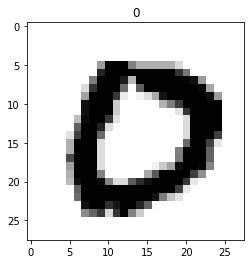

In [28]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');
print('min-max:',images[0].numpy().min(), images[0].numpy().max()) # check normalization
plt.title(labels[0].numpy())

In [29]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)));
        x = self.pool(F.relu(self.conv2(x)));
        x = x.view(-1, 16 * 4 * 4); 
        x = F.relu(self.fc1(x)); 
        x = F.relu(self.fc2(x));
        x = self.fc3(x);
        return x


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
net = Net().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

cuda


In [30]:
def test():
  correct = 0
  total = 0
  with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
  print('model accuracy: %d %%' % (100 * correct / total))

In [31]:

for epoch in range(n_epochs):  # loop over the dataset multiple times
    t = time.time()
    for i, data in enumerate(train_loader, 0):
        
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
    
    # print statistics
    print('epoch {} loss:{:.3f} time:{:.3f}'.format(epoch + 1, loss.item(), time.time()-t))
    test()
    

print('Finished Training')


epoch 1 loss:2.257 time:11.126
model accuracy: 32 %
epoch 2 loss:0.624 time:11.207
model accuracy: 80 %
epoch 3 loss:0.268 time:10.838
model accuracy: 92 %
epoch 4 loss:0.208 time:11.051
model accuracy: 94 %
epoch 5 loss:0.184 time:10.811
model accuracy: 95 %
epoch 6 loss:0.157 time:10.724
model accuracy: 96 %
epoch 7 loss:0.089 time:10.968
model accuracy: 96 %
epoch 8 loss:0.098 time:10.628
model accuracy: 97 %
epoch 9 loss:0.107 time:10.897
model accuracy: 97 %
epoch 10 loss:0.107 time:11.163
model accuracy: 97 %
epoch 11 loss:0.078 time:10.840
model accuracy: 97 %
epoch 12 loss:0.073 time:10.680
model accuracy: 97 %
epoch 13 loss:0.062 time:10.956
model accuracy: 97 %
epoch 14 loss:0.073 time:10.787
model accuracy: 98 %
epoch 15 loss:0.075 time:10.877
model accuracy: 98 %
epoch 16 loss:0.054 time:10.653
model accuracy: 97 %
epoch 17 loss:0.051 time:10.995
model accuracy: 98 %
epoch 18 loss:0.068 time:10.813
model accuracy: 98 %
epoch 19 loss:0.053 time:10.869
model accuracy: 98 %
ep

In [34]:
torch.save(net.state_dict(), 'MNISTnet.pth')